In [53]:
import requests
from dotenv import load_dotenv
load_dotenv()
import os

In [54]:
import http.client
import json

connection = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token': '3a6d03933d0447719cf4df0d5ddbece3' }
connection.request('GET', '/v2/competitions/PL/matches?season=2018', None, headers )
response = json.loads(connection.getresponse().read().decode())



In [55]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(response)

{   'competition': {   'area': {'id': 2072, 'name': 'England'},
                       'code': 'PL',
                       'id': 2021,
                       'lastUpdated': '2019-11-10T17:28:07Z',
                       'name': 'Premier League',
                       'plan': 'TIER_ONE'},
    'count': 380,
    'filters': {},
    'matches': [   {   'awayTeam': {'id': 338, 'name': 'Leicester City FC'},
                       'group': 'Regular Season',
                       'homeTeam': {'id': 66, 'name': 'Manchester United FC'},
                       'id': 233028,
                       'lastUpdated': '2019-04-20T15:34:33Z',
                       'matchday': 1,
                       'referees': [   {   'id': 11610,
                                           'name': 'Andre Marriner',
                                           'nationality': None},
                                       {   'id': 11611,
                                           'name': 'Scott Ledger',
                

In [59]:
response.status_code

AttributeError: 'dict' object has no attribute 'status_code'

In [60]:
response.keys()

dict_keys(['count', 'filters', 'competition', 'matches'])

In [142]:
response['matches'][:1]

KeyError: 'matches'

In [143]:
response['matches'][0]['homeTeam']['name']

KeyError: 'matches'

In [130]:
import pandas as pd

df = pd.DataFrame.from_dict(response['matches'])
print(len(df)) #Print how many rows
print(df.columns) #Print column names
df.head() #Previews the first five rows. 

3
Index(['id', 'competition', 'season', 'utcDate', 'status', 'matchday', 'stage',
       'group', 'lastUpdated', 'score', 'homeTeam', 'awayTeam', 'referees'],
      dtype='object')


,id,competition,season,utcDate,status,matchday,stage,group,lastUpdated,score,homeTeam,awayTeam,referees
0,264451,"{'id': 2021, 'name': 'Premier League'}","{'id': 468, 'startDate': '2019-08-09', 'endDat...",2019-11-10T14:00:00Z,FINISHED,12,REGULAR_SEASON,Regular Season,2019-11-10T19:34:27Z,"{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 76, 'name': 'Wolverhampton Wanderers FC'}","{'id': 58, 'name': 'Aston Villa FC'}","[{'id': 11580, 'name': 'Anthony Taylor', 'nati..."
1,264456,"{'id': 2021, 'name': 'Premier League'}","{'id': 468, 'startDate': '2019-08-09', 'endDat...",2019-11-10T14:00:00Z,FINISHED,12,REGULAR_SEASON,Regular Season,2019-11-10T19:34:27Z,"{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 66, 'name': 'Manchester United FC'}","{'id': 397, 'name': 'Brighton & Hove Albion FC'}","[{'id': 11567, 'name': 'Jonathan Moss', 'natio..."
2,264452,"{'id': 2021, 'name': 'Premier League'}","{'id': 468, 'startDate': '2019-08-09', 'endDat...",2019-11-10T16:30:00Z,FINISHED,12,REGULAR_SEASON,Regular Season,2019-11-10T19:34:27Z,"{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 64, 'name': 'Liverpool FC'}","{'id': 65, 'name': 'Manchester City FC'}","[{'id': 11605, 'name': 'Michael Oliver', 'nati..."


In [139]:
connection = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token': '3a6d03933d0447719cf4df0d5ddbece3' }
connection.request('GET', '/v2/matches?dateFrom=2018-08-01?dateTo=2019-05-30', None, headers )
response = json.loads(connection.getresponse().read().decode())





In [140]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(response)

{   'errorCode': 400,
    'message': 'Parameter dateFrom must be used in conjunction with dateTo and '
               'vice versa.'}


In [7]:
import pandas as pd

dft= pd.read_csv('~/Desktop/season-1819_csv.csv')

In [8]:
dft.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [26]:
dft['Total_goals'] = dft['FTHG'] + dft['FTAG']
dft.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Total_goals
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69,3
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70,2
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90,2
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58,3
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89,3


In [77]:
dft.groupby('FTR').count()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Total_goals,home_team_win,away_team_win
FTR,,,,,,,,,,,,,,,,,,,,,
A,128,128,128,128,128,128,128,128,128,128,...,128,128,128,128,128,128,128,128,128,128
D,71,71,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71
H,181,181,181,181,181,181,181,181,181,181,...,181,181,181,181,181,181,181,181,181,181


In [44]:
home_wins =dft.groupby('FTR').count()
home_wins

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Total_goals,home_team_win,away_team_win
FTR,,,,,,,,,,,,,,,,,,,,,
A,128,128,128,128,128,128,128,128,128,128,...,128,128,128,128,128,128,128,128,128,128
D,71,71,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71
H,181,181,181,181,181,181,181,181,181,181,...,181,181,181,181,181,181,181,181,181,181


In [78]:
Home_win_ratio = 181/380
Home_win_ratio

0.4763157894736842

# Conducting a Welch t test 

## Step 1: Set up null and alternative hypotheses 

1. Is a team more likely to win playing at home?
    * $H_0$: There is no relationship between the team's home and away match performance.
    * $H_1$: A team is significantly more likely to win if they play at home.

## Step 2: Choose a significance level 

Alpha or α, is set at a significance level of 0.05. This indicates a 5% risk of concluding that a difference exists when there is no actual difference. Alpha sets the standard for how extreme the data must be before we can reject the null hypothesis. 

## Step 3: Calculate t-static

In [84]:
import numpy as np
#initiate new columns with 0’s (there are other approaches)
dft['home_team_win'] = np.zeros
dft['away_team_win'] = np.zeros



In [136]:
#set home team WINs equal to 1 in the new column
dft['home_team_win'].loc[dft['FTHG'] > dft['FTAG']] = 1
#LOSS = 0
dft['home_team_win'].loc[dft['FTHG'] < dft['FTAG']] = 0
#TIE = 0
dft['home_team_win'].loc[dft['FTHG'] == dft['FTAG']] = 0

#getting to a win rate for home games
home_team_win_array = np.array(dft['home_team_win'])
home_win_rate = np.mean(home_team_win_array)


In [89]:
#set away team WINs equal to 1 in the new column
dft['away_team_win'].loc[dft['FTHG'] < dft['FTAG']] = 1
#LOSS = 0
dft['away_team_win'].loc[dft['FTHG'] > dft['FTAG']] = 0
#TIE = 0
dft['away_team_win'].loc[dft['FTHG'] == dft['FTAG']] = 0

#getting to a win rate for the away games
away_team_win_array = np.array(dft['away_team_win'])
away_win_rate = np.mean(away_team_win_array)


In [88]:
dft.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Total_goals,home_team_win,away_team_win
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.75,1.70,2.29,2.21,1.55,4.07,7.69,3,1,0
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,2.20,2.13,1.80,1.75,1.88,3.61,4.70,2,1,0
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,2.18,2.11,1.81,1.77,2.62,3.38,2.90,2,0,1
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,1.80,2.13,2.06,7.24,3.95,1.58,3,0,1
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,2.20,2.12,1.80,1.76,4.74,3.53,1.89,3,0,1


In [202]:
from pandas import DataFrame
export_to_csv = dft.to_csv(r'~/Desktop/Week_6/Footytable.csv',index = None, header=True)



In [ ]:
def Sample_slicing(df):
    
    home_team_win_array = np.array(df['home_team_win'])
    
    away_team_win_array = np.array(df['away_team_win'])


In [ ]:
def Sample_making(home_team_win_array,away_team_win_array ):
    
    np.random.seed(40)
    sample_home = np.random.choice(home_team_win_array,size=100)
    sample_away = np.random.choice(away_team_win_array,size=100)
    
    sample_home_mean= np.random.choice(home_team_win_array,size=100).mean()
    sample_away_mean= np.random.choice(away_team_win_array,size=100).mean() 


In [ ]:
def hist_sample(sample_a)

plt.hist(sample_home)
plt.title("Number of Sample Home Wins ")
plt.ylabel("Number of games")

In [208]:
def Sample_norm(df, team_win):

    np.random.seed(40)
    probs = []
    for i in range(200):
        sample = df.sample(n=100, replace = True)
        p = np.sum(sample.team_win)/100
        probs.append(p)

sns.distplot(probs, norm_hist= True)
plt.title("Home Win Normal Distribution")

SyntaxError: invalid syntax (<ipython-input-208-c60372ee4d54>, line 1)

In [ ]:
def cal_power(effect_s, nob1, alpha_level):

    power_analysis = TTestIndPower()
    power_analysis.solve_power(effect_size= effect_s, nobs1=nob1, alpha= alpha_level)

In [ ]:
home_win_rate = np.mean(home_team_win_array)
away_win_rate = np.mean(away_team_win_array)

In [46]:
home_win_rate

0.4763157894736842

In [90]:
away_win_rate

0.3368421052631579

In [93]:
# Generate random sample from the Home and Away games population 
import numpy as np
np.random.seed(40)
sample_home = np.random.choice(home_team_win_array,size=100)
sample_away = np.random.choice(away_team_win_array,size=100)

In [141]:
# Calculating Sample Home wins rate
np.random.seed(40)
sample_home_mean= np.random.choice(home_team_win_array,size=100).mean() 
print("Home Win Ratio:", sample_home_mean)

#Calculating Sample Away win rate
sample_away_mean= np.random.choice(away_team_win_array,size=100).mean() 
print("Away Win Ratio:", sample_away_mean)

Home Win Ratio: 0.43
Away Win Ratio: 0.22


Text(0, 0.5, 'Number of games')

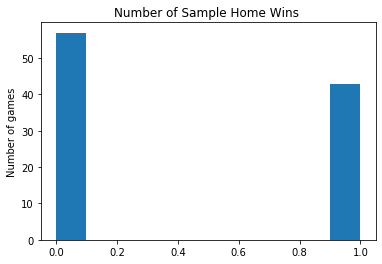

In [144]:
# Plotting histogram for the sample Home team wins
plt.hist(sample_home,)
plt.title("Number of Sample Home Wins ")
plt.xlabel("")
plt.ylabel("Number of games")

Text(0, 0.5, 'Number of games')

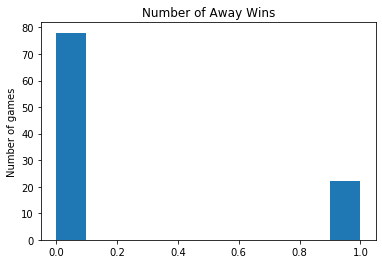

In [146]:
# Plotting histogram for the sample Home team wins
plt.hist(sample_away)
plt.title("Number of Away Wins")
plt.xlabel("")
plt.ylabel("Number of games")

In [79]:
alpha =0.05

Text(0.5, 1.0, 'Home Win Normal Distribution')

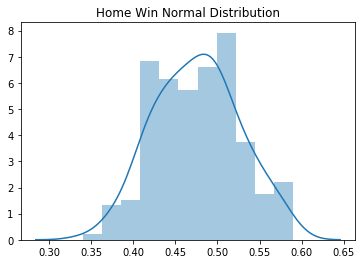

In [207]:
import scipy.stats
import seaborn as sns

np.random.seed(40)
probs = []
for i in range(200):
    sample = dft.sample(n=100, replace = True)
    p = np.sum(sample.home_team_win)/100
    probs.append(p)

#print(probs[:5])
sns.distplot(probs, norm_hist= True)
plt.title("Home Win Normal Distribution")

[0.72, 0.44, 0.6, 0.64, 0.68]


Text(0.5, 1.0, 'Away Win Normal Distribution')

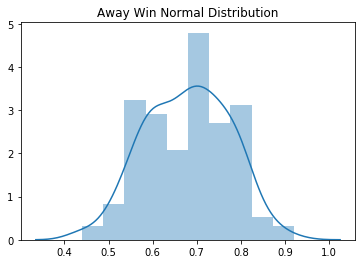

In [170]:
np.random.seed(40)
probs = []
for i in range(200):
    sample = dft.sample(n=100, replace = True)
    p = np.sum(sample.away_team_win)/50
    probs.append(p)

print(probs[:5])
sns.distplot(probs, norm_hist= True)
plt.title("Away Win Normal Distribution")

In [186]:
tt_results = stats.ttest_ind(sample_home, sample_away, equal_var=False)
t = tt_results.statistic 
t


3.2368691376474987

## Calculate the degrees of freedom

In [102]:
# Calculate degrees of freedom for welch test 
def welch_test(a, b):
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

welch_test(sample_home, sample_away)

192.02569990338532

In [187]:
t 
df = welch_df(sample_home, sample_away)
print(t,df)

3.2368691376474987 192.02569990338532


In [193]:
t_crit = np.round(stats.t.ppf(1 - 0.05, df=df),3)
t_crit

1.653

## Step 4: Calculate p-value (find the rejection region)

In [75]:
import scipy.stats as stats

In [104]:
p = 1 - stats.t.cdf(t, df)
print(p)

0.0007117620832849392


In [151]:
scipy.stats.ttest_ind(sample_home, sample_away, axis=0, equal_var=False)

Ttest_indResult(statistic=3.2368691376474987, pvalue=0.0014235241665698068)

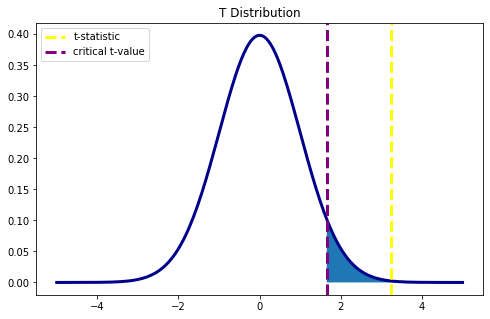

In [190]:
# generate points on the x axis between -5 and 5:
xsize = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ysize = stats.t.pdf(xs, df, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xsize, ysize, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t, color='yellow', linestyle='--', lw=3,label='t-statistic')

ax.axvline(t_crit, color='purple', linestyle='--', lw=3, label='critical t-value')
ax.fill_betweenx(ysize, xsize, t_crit, where = xsize > t_crit)

ax.legend()
plt.title("T Distribution")
plt.show()

## Step 5: Calculate effect size (Cohen d)

In [130]:
import scipy.stats
#sample_home std 
sample_home_sd = np.std(sample_home,axis=0)
print("Home Win Std:", sample_home_sd)

# Generate a normal distribution for sample home wins 
sample_home_norm = scipy.stats.norm(sample_home_mean, sample_home_sd)

#sample_away std
sample_away_sd = np.std(sample_away,axis=0)
print("Away win Std:", sample_away_sd)

# Generate a normal distribution for sample away wins
sample_away_norm = scipy.stats.norm(sample_away_mean, sample_away_sd)


Home Win Std: 0.4950757517794625
Away win Std: 0.41424630354415964


In [194]:
def Compare_sample(rv, x=4):

    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

Text(0.5, 0, 'Win Ratio')

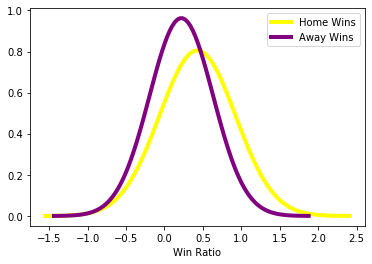

In [195]:
# Home win ratio
xs, ys = Compare_sample(sample_home_norm)
plt.plot(xs, ys, label='Home Wins', linewidth=4, color='yellow') 

# Away win ratio
xs, ys = evaluate_PDF(sample_away_norm)
plt.plot(xs, ys, label='Away Wins', linewidth=4, color='purple')
plt.legend()
plt.xlabel('Win Ratio')

In [131]:
def Cohen_d(group1, group2):

    # group1: Home Win array
    # group2: Away Win array 

    

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d


In [150]:
print("Cohen's D:",Cohen_d(sample_home, sample_away))

Cohen's D: 0.4600685459305424


In [153]:
#Calculate Statistical Power
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt

power_analysis = TTestIndPower()
power_analysis.solve_power(effect_size=.46, nobs1=100, alpha=.05)

0.8991831394122165

## Findings and Application


Using the football stats from the dataframe, we create 2 binary columns, where the 1's represent the home or away team winning and 0’s represent “not wins”, or the team drawing or losing. The win rate captures a team's overall wins over total matches, which is solely based on the chance of a particular team achieving a win given a played match.

Using two samples, Home win ratio and Away win ratio, we decided to use a Welch t-test as it is more reliable when the two independent samples have unequal variances and/or unequal sample sizes. The two samples we’re using are independent and non-overlapping (a team cannot win a Home and Away game at once) therefore Welch t-test is more suitable for our hypothesis testing.

From conducting a welch t-test, the calculated p value is 0.0007, effect size (cohen’s d) = 0.46 and power = 89.9%. As the p value is lower than the alpha (0.05) we can reject the null hypothesis. However calculating an incredibly low p-value does not guarantee that the null-hypothesis is incorrect. Therefore we calculated cohen’s d (0.46). Using the general “rule of thumb” guidelines this means there is a medium effect. The statistical power is ~90%. This high power suggest a high probability of rejecting the null hypothesis, given that it is indeed false. 

In conclusion, we can reject the null hypothesis as our p value is smaller than alpha, there is a high statistical power and a medium effect size. 


In [9]:
dft.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA',
       'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [10]:
import json
import pandas as pd
f = open('player_data.txt')
data = json.load(f)
df = pd.DataFrame(data['data'])
df.head()

,id,competition_id,full_name,first_name,last_name,known_as,shorthand,age,league,league_type,...,red_cards_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,last_match_timestamp
0,463545,1625,David de Gea Quintana,David,de Gea Quintana,David de Gea,david-de-gea,28,Premier League,Domestic League,...,0,90,3420,0,0.03,310,419,90,18,1557669600
1,4290,1625,Matteo Darmian,Matteo,Darmian,Matteo Darmian,matteo-darmian,29,Premier League,Domestic League,...,0,74,0,0,0.00,411,366,102,25,1556132400
2,3040,1625,Victor Nilsson Lindelöf,Victor,Nilsson Lindelöf,Victor Nilsson Lindelöf,victor-nilsson-lindelof,25,Premier League,Domestic League,...,0,87,2602,2602,0.03,263,249,88,14,1557061200
3,4120,1625,Luke Shaw,Luke,Shaw,Luke Shaw,luke-shaw,24,Premier League,Domestic League,...,0,89,236,648,0.38,262,104,79,13,1557061200
4,4121,1625,Eric Bertrand Bailly,Eric Bertrand,Bailly,Eric Bertrand Bailly,eric-bertrand-bailly,25,Premier League,Domestic League,...,1,53,319,0,0.28,340,271,142,26,1556465400


In [11]:
df.columns

Index(['id', 'competition_id', 'full_name', 'first_name', 'last_name',
       'known_as', 'shorthand', 'age', 'league', 'league_type', 'season',
       'starting_year', 'ending_year', 'url', 'club_team_id', 'club_team_2_id',
       'national_team_id', 'position', 'minutes_played_overall',
       'minutes_played_home', 'minutes_played_away', 'birthday', 'nationality',
       'continent', 'appearances_overall', 'appearances_home',
       'appearances_away', 'goals_overall', 'goals_home', 'goals_away',
       'clean_sheets_home', 'clean_sheets_away', 'clean_sheets_overall',
       'conceded_overall', 'conceded_home', 'conceded_away', 'assists_overall',
       'assists_home', 'assists_away', 'penalty_goals', 'penalty_misses',
       'penalty_success', 'goals_involved_per_90_overall',
       'assists_per_90_overall', 'goals_per_90_overall',
       'clean_sheets_per_overall', 'goals_per_90_home', 'goals_per_90_away',
       'min_per_goal_overall', 'conceded_per_90_overall',
       'min_per_c

In [ ]:
matches_view= df[df[home]]